In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load datasets
train_df = pd.read_csv('./titanic/train.csv')
test_df = pd.read_csv('./titanic/test.csv')
gender_submission_df = pd.read_csv('./titanic9/gender_submission.csv')

In [5]:
# Step 1: Data Cleaning
# Identify missing values
print("Missing values in each column:")
print(train_df.isnull().sum())

Missing values in each column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [6]:
# Filling missing values
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

In [7]:
# Dropping the 'Cabin' column due to high percentage of missing values
train_df.drop(columns=['Cabin'], inplace=True)

In [8]:
# Confirming no more missing values
print("Missing values after filling:")
print(train_df.isnull().sum())

Missing values after filling:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [9]:
# Step 2: Data Transformation
# Encoding categorical variables
train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})
train_df['Embarked'] = train_df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [10]:
# Display the cleaned and transformed data
print("Transformed data:")
print(train_df.head())


Transformed data:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare  Embarked  
0         A/5 21171   7.2500         2  
1          PC 17599  71.2833         0  
2  STON/O2. 3101282   7.9250         2  
3            113803  53.1000         2  
4            373450   8.0500         2  


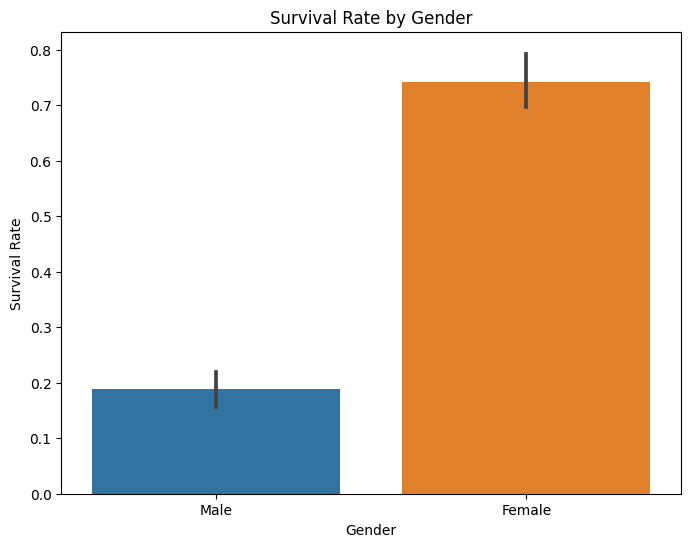

In [11]:
# Step 3: Exploratory Data Analysis (EDA)

# 1. Survival Rate by Gender
plt.figure(figsize=(8, 6))
sns.barplot(x='Sex', y='Survived', data=train_df)
plt.xticks([0, 1], ['Male', 'Female'])
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Gender')
plt.show()

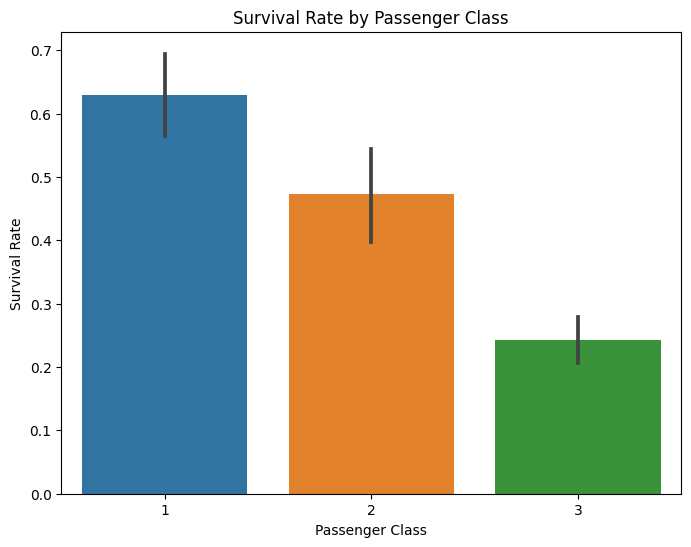

In [12]:
# 2. Survival Rate by Passenger Class
plt.figure(figsize=(8, 6))
sns.barplot(x='Pclass', y='Survived', data=train_df)
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Passenger Class')
plt.show()


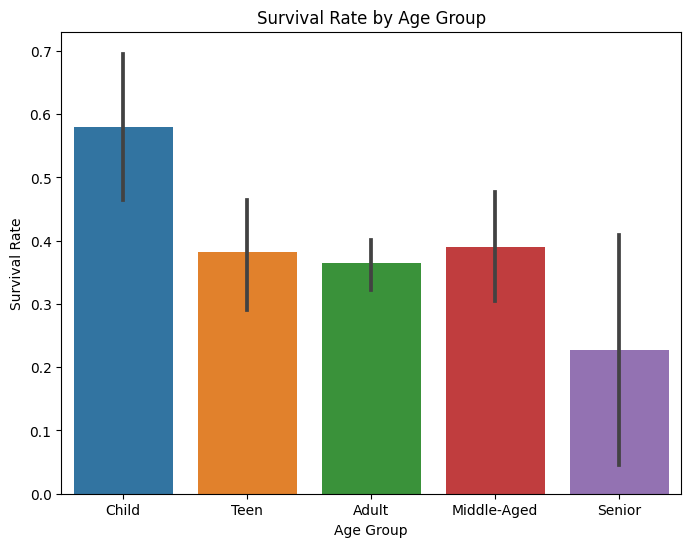

In [13]:
# 3. Survival Rate by Age Group
# Creating age groups for better insights
train_df['AgeGroup'] = pd.cut(train_df['Age'], bins=[0, 12, 20, 40, 60, 80], labels=['Child', 'Teen', 'Adult', 'Middle-Aged', 'Senior'])
plt.figure(figsize=(8, 6))
sns.barplot(x='AgeGroup', y='Survived', data=train_df)
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Age Group')
plt.show()

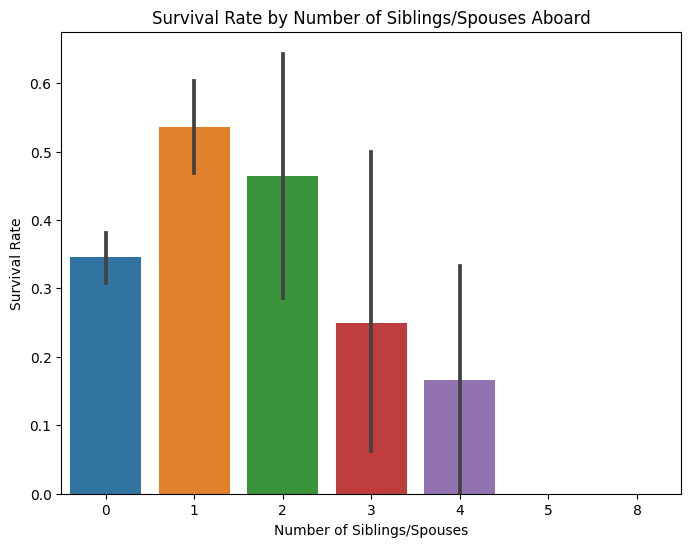

In [14]:

# 4. Survival Rate by Number of Siblings/Spouses (SibSp)
plt.figure(figsize=(8, 6))
sns.barplot(x='SibSp', y='Survived', data=train_df)
plt.xlabel('Number of Siblings/Spouses')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Number of Siblings/Spouses Aboard')
plt.show()

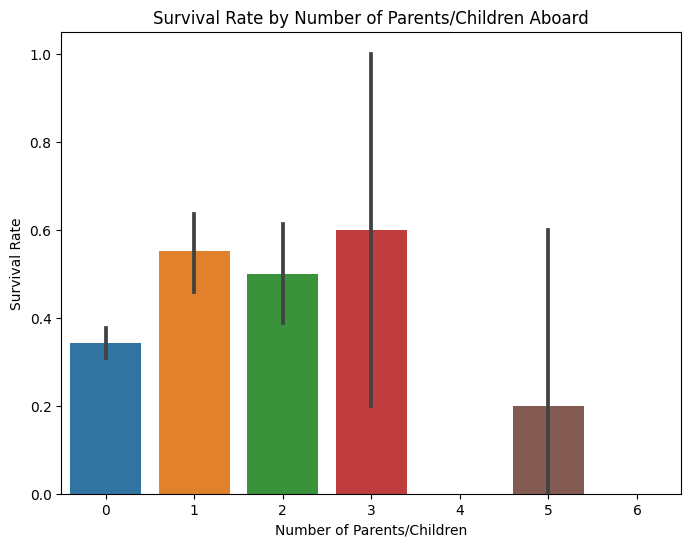

In [15]:

# 5. Survival Rate by Number of Parents/Children (Parch)
plt.figure(figsize=(8, 6))
sns.barplot(x='Parch', y='Survived', data=train_df)
plt.xlabel('Number of Parents/Children')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Number of Parents/Children Aboard')
plt.show()